In [7]:
import pandas as pd

# URL Seeds Dataset dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Nama kolom sesuai dokumentasi UCI
columns = [
    "Area", "Perimeter", "Compactness", "KernelLength", "KernelWidth",
    "AsymmetryCoeff", "GrooveLength", "Class"
]

# Baca seluruh data (dipisahkan spasi/tab)
df = pd.read_csv(url, sep='\s+', header=None, names=columns)

# Tampilkan semua baris
pd.set_option('display.max_rows', None)

# Tampilkan seluruh isi dataset
print(df)


      Area  Perimeter  Compactness  KernelLength  KernelWidth  AsymmetryCoeff  \
0    15.26      14.84       0.8710         5.763        3.312          2.2210   
1    14.88      14.57       0.8811         5.554        3.333          1.0180   
2    14.29      14.09       0.9050         5.291        3.337          2.6990   
3    13.84      13.94       0.8955         5.324        3.379          2.2590   
4    16.14      14.99       0.9034         5.658        3.562          1.3550   
5    14.38      14.21       0.8951         5.386        3.312          2.4620   
6    14.69      14.49       0.8799         5.563        3.259          3.5860   
7    14.11      14.10       0.8911         5.420        3.302          2.7000   
8    16.63      15.46       0.8747         6.053        3.465          2.0400   
9    16.44      15.25       0.8880         5.884        3.505          1.9690   
10   15.26      14.85       0.8696         5.714        3.242          4.5430   
11   14.03      14.16       

In [8]:
# Cek info data
print(df.info())

# Statistik deskriptif
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            210 non-null    float64
 1   Perimeter       210 non-null    float64
 2   Compactness     210 non-null    float64
 3   KernelLength    210 non-null    float64
 4   KernelWidth     210 non-null    float64
 5   AsymmetryCoeff  210 non-null    float64
 6   GrooveLength    210 non-null    float64
 7   Class           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB
None
             Area   Perimeter  Compactness  KernelLength  KernelWidth  \
count  210.000000  210.000000   210.000000    210.000000   210.000000   
mean    14.847524   14.559286     0.870999      5.628533     3.258605   
std      2.909699    1.305959     0.023629      0.443063     0.377714   
min     10.590000   12.410000     0.808100      4.899000     2.630000   
25%     12.270000   13.45

In [9]:
print(df['Class'].value_counts())


Class
1    70
2    70
3    70
Name: count, dtype: int64


In [20]:
# Fitur numerik
X = df.drop('Class', axis=1)

# Label (untuk evaluasi nanti, bukan untuk training)
y = df['Class']


In [22]:
print(X_norm.head())


       Area  Perimeter  Compactness  KernelLength  KernelWidth  \
0  0.440982   0.502066     0.570780      0.486486     0.486101   
1  0.405099   0.446281     0.662432      0.368806     0.501069   
2  0.349386   0.347107     0.879310      0.220721     0.503920   
3  0.306893   0.316116     0.793103      0.239302     0.533856   
4  0.524079   0.533058     0.864791      0.427365     0.664291   

   AsymmetryCoeff  GrooveLength  Cluster  
0        0.189302      0.345150      0.0  
1        0.032883      0.215165      0.0  
2        0.251453      0.150665      0.0  
3        0.194243      0.140817      0.0  
4        0.076701      0.322994      0.0  


In [21]:
# Min-Max Normalization
X_norm = (X - X.min()) / (X.max() - X.min())


 Tahap 3: K-Means Clustering from scratch (tanpa library)

✅ Implementasi K-Means dari Nol

In [12]:
import numpy as np

# Ubah data normalisasi jadi array
X_array = X_norm.values

# Fungsi jarak Euclidean
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Fungsi K-Means
def kmeans(X, k, max_iters=100):
    np.random.seed(42)
    # Inisialisasi centroid secara acak
    centroids = X[np.random.choice(len(X), k, replace=False)]

    for _ in range(max_iters):
        # 1. Assign ke centroid terdekat
        labels = np.array([
            np.argmin([euclidean_distance(x, c) for c in centroids])
            for x in X
        ])

        # 2. Hitung centroid baru
        new_centroids = np.array([
            X[labels == i].mean(axis=0)
            for i in range(k)
        ])

        # 3. Cek konvergensi
        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels


In [13]:
centroids, labels = kmeans(X_array, k=3)

# Tambahkan label klaster ke DataFrame
df['Cluster'] = labels


 Tahap 4: Visualisasi & Evaluasi Hasil Clustering

✅ 1. Visualisasi Klaster (PCA ke 2 dimensi)

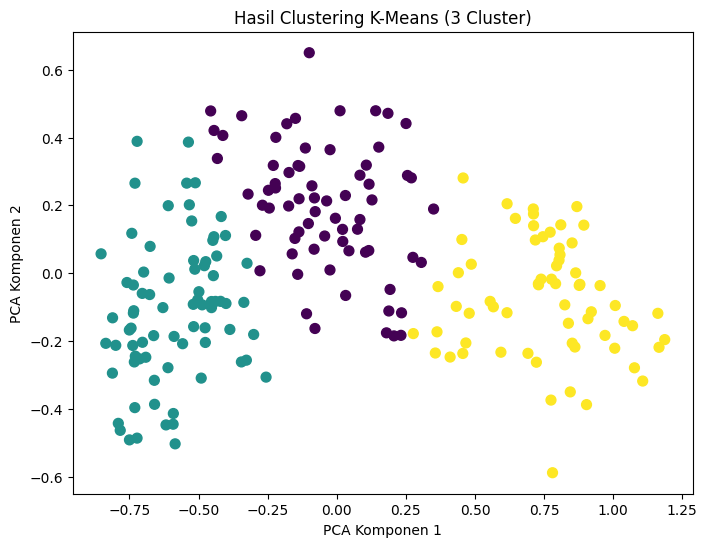

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA: reduksi ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_array)

# Plot hasil klaster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("Hasil Clustering K-Means (3 Cluster)")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.show()


✅ 2. Evaluasi – Perbandingan Klaster vs Label Asli

In [15]:
from sklearn.metrics import confusion_matrix

# Confusion matrix (label asli vs hasil cluster)
cm = confusion_matrix(y, df['Cluster'])
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[ 0  0  0  0]
 [58 10  2  0]
 [ 8  0 62  0]
 [ 3 67  0  0]]


✅ 3. Evaluasi – Silhouette Score

In [16]:
from sklearn.metrics import silhouette_score

# Nilai silhouette score (semakin mendekati 1 → cluster makin baik)
score = silhouette_score(X_array, df['Cluster'])
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: 0.422


🔁 Tahap 5: Eksperimen

Tujuannya: membandingkan performa clustering di berbagai kondisi, lalu menganalisis perubahan hasil. Ini sangat penting untuk laporan.

 Eksperimen 1: Ubah Jumlah Klaster (k = 2 dan k = 4)

In [17]:
# Eksperimen dengan k = 2
_, labels_k2 = kmeans(X_array, k=2)
score_k2 = silhouette_score(X_array, labels_k2)
print(f"Silhouette Score (k=2): {score_k2:.3f}")

# Eksperimen dengan k = 4
_, labels_k4 = kmeans(X_array, k=4)
score_k4 = silhouette_score(X_array, labels_k4)
print(f"Silhouette Score (k=4): {score_k4:.3f}")


Silhouette Score (k=2): 0.505
Silhouette Score (k=4): 0.346


Eksperimen 2: Ubah Inisialisasi Centroid (Seed Berbeda)

In [18]:
# Ganti seed: misalnya 1
np.random.seed(1)
_, labels_seed1 = kmeans(X_array, k=3)
score_seed1 = silhouette_score(X_array, labels_seed1)
print(f"Silhouette Score (k=3, seed=1): {score_seed1:.3f}")


Silhouette Score (k=3, seed=1): 0.422


 Eksperimen 3 (Opsional): Gunakan Z-score Normalization

In [19]:
# Normalisasi Z-score
X_z = (X - X.mean()) / X.std()
X_z_array = X_z.values

# Jalankan K-Means pada Z-score
_, labels_z = kmeans(X_z_array, k=3)
score_z = silhouette_score(X_z_array, labels_z)
print(f"Silhouette Score (Z-score norm, k=3): {score_z:.3f}")


Silhouette Score (Z-score norm, k=3): 0.404
